## Load and Inspect Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


In [2]:
#load dataset and check information
df = pd.read_csv('Bank_complaints.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
Product                         60000 non-null object
Consumer complaint narrative    60000 non-null object
dtypes: object(2)
memory usage: 937.6+ KB
None


,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


In [3]:
#Preview what these categories are and what percent of the complaints each accounts for.
df["Product"].value_counts(normalize=True)

Student loan                   0.190067
Credit card                    0.159000
Consumer Loan                  0.157900
Mortgage                       0.138867
Bank account or service        0.138483
Credit reporting               0.114400
Checking or savings account    0.101283
Name: Product, dtype: float64

## Preprocessing

In [4]:

complaints = df["Consumer complaint narrative"] #Our raw text complaints

tokenizer = Tokenizer(num_words=2000) #Initialize a tokenizer.

tokenizer.fit_on_texts(complaints) #Fit it to the complaints

sequences = tokenizer.texts_to_sequences(complaints) #Generate sequences
print('sequences type:', type(sequences))

one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary') #Similar to sequences, but returns a numpy array
print('one_hot_results type:', type(one_hot_results))

word_index = tokenizer.word_index #Useful if we wish to decode (more explanation below)

print('Found %s unique tokens.' % len(word_index)) #Tokens are the number of unique words across the corpus


print('Dimensions of our coded results:', np.shape(one_hot_results)) #Our coded data

sequences type: <class 'list'>
one_hot_results type: <class 'numpy.ndarray'>
Found 50334 unique tokens.
Dimensions of our coded results: (60000, 2000)


### Decode Word Vectors

In [5]:
#take the word_index dictionary object and change the orientation so that the values are keys and the keys values.
reverse_index = dict([(value, key) for (key, value) in word_index.items()])

comment_idx_to_preview = 19
print('Original complaint text:')
print(complaints[comment_idx_to_preview])
print('\n\n')

#The reverse_index cell block above must be complete in order for this cell block to successively execute.
decoded_review = ' '.join([reverse_index.get(i) for i in sequences[comment_idx_to_preview]])
print('Decoded review from Tokenizer:')
print(decoded_review)

Original complaint text:
I have already filed several complaints about AES/PHEAA. I was notified by a XXXX XXXX let @ XXXX, who pretended to be from your office, he said he was from CFPB. I found out this morning he is n't from your office, but is actually works at XXXX. 

This has wasted weeks of my time. They AES/PHEAA confirmed and admitted ( see attached transcript of XXXX, conversation at XXXX ( XXXX ) with XXXX that proves they verified the loans are not mine ) the student loans they had XXXX, and collected on, and reported negate credit reporting in my name are in fact, not mine. 
They conclued their investigation on XXXX admitting they made a mistake and have my name on soneone elses loans. I these XXXX loans total {$10000.00}, original amount. My XXXX loans I got was total {$3500.00}. We proved by providing AES/PHEAA, this with my original promissary notes I located recently, the XXXX of my college provided AES/PHEAA with their original shoeinf amounts of my XXXX loans which s

### Converting descriptive categories into integers

In [6]:
product = df["Product"]

le = preprocessing.LabelEncoder() #Initialize. le used as abbreviation fo label encoder
le.fit(product)
print("Original class labels:")
print(list(le.classes_))
print('\n')
product_cat = le.transform(product)  
#list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) #If you wish to retrieve the original descriptive labels post production

print('New product labels:')
print(product_cat)
print('\n')


print('One hot labels; 7 binary columns, one for each of the categories.') #Each row will be all zeros except for the category for that observation.
product_onehot = to_categorical(product_cat)
print(product_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(product_onehot))

Original class labels:
['Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Credit card', 'Credit reporting', 'Mortgage', 'Student loan']


New product labels:
[6 6 6 ... 4 4 4]


One hot labels; 7 binary columns, one for each of the categories.
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


One hot labels shape:
(60000, 7)


### Train-Test-Split

In [7]:
import random
random.seed(123)
test_index = random.sample(range(1,10000), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)


label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print("Test label shape:", np.shape(label_test))
print("Train label shape:", np.shape(label_train))
print("Test shape:", np.shape(test))
print("Train shape:", np.shape(train))

Test label shape: (1500, 7)
Train label shape: (58500, 7)
Test shape: (1500, 2000)
Train shape: (58500, 2000)


## Build the Network

In [8]:
model = models.Sequential()#instantiate model design
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #1st hidden layer
model.add(layers.Dense(25, activation='relu'))#2nd hidden layer
model.add(layers.Dense(7, activation='softmax'))#output layer - softmax will reyurn probability between 0-1

W0729 14:19:20.775537   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 14:19:24.199692   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 14:19:24.635709   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



## Compiling the Model

In [9]:
model.compile(optimizer='SGD', #stochastic gradient descent
              loss='categorical_crossentropy', #loss function
              metrics=['accuracy']) #metric determined

W0729 14:21:56.845247   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 14:21:57.499509   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Training the Model

In [10]:
history = model.fit(train,
                    label_train,
                    epochs=120,
                    batch_size=256)

W0729 14:22:46.185747   740 deprecation.py:323] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0729 14:22:46.239639   740 deprecation_wrapper.py:119] From C:\Users\perso\Anaconda3\envs\learn-env\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/120
58500/58500 [==============================] - 3s 47us/step - loss: 1.8559 - acc: 0.2633
Epoch 2/120
58500/58500 [==============================] - 2s 29us/step - loss: 1.5373 - acc: 0.4997
Epoch 3/120
58500/58500 [==============================] - 2s 29us/step - loss: 1.1523 - acc: 0.6423
Epoch 4/120
58500/58500 [==============================] - 2s 29us/step - loss: 0.9189 - acc: 0.6955
Epoch 5/120
58500/58500 [==============================] - 2s 28us/step - loss: 0.7989 - acc: 0.7223
Epoch 6/120
58500/58500 [==============================] - 2s 30us/step - loss: 0.7312 - acc: 0.7389
Epoch 7/120
58500/58500 [==============================] - 2s 29us/step - loss: 0.6873 - acc: 0.7514
Epoch 8/120
58500/58500 [==============================] - 2s 28us/step - loss: 0.6556 - acc: 0.7618
Epoch 9/120
58500/58500 [==============================] - 2s 29us/step - loss: 0.6310 - acc: 0.7703
Epoch 10/120
58500/58500 [==============================] - 2s 30us/step - loss: 0.6110 - a

58500/58500 [==============================] - 2s 31us/step - loss: 0.3666 - acc: 0.8703
Epoch 82/120
58500/58500 [==============================] - 2s 28us/step - loss: 0.3657 - acc: 0.8700
Epoch 83/120
58500/58500 [==============================] - 2s 27us/step - loss: 0.3646 - acc: 0.8709
Epoch 84/120
58500/58500 [==============================] - 2s 28us/step - loss: 0.3635 - acc: 0.8704
Epoch 85/120
58500/58500 [==============================] - 2s 27us/step - loss: 0.3623 - acc: 0.8727
Epoch 86/120
58500/58500 [==============================] - 2s 27us/step - loss: 0.3614 - acc: 0.8716
Epoch 87/120
58500/58500 [==============================] - 2s 28us/step - loss: 0.3603 - acc: 0.8716
Epoch 88/120
58500/58500 [==============================] - 2s 27us/step - loss: 0.3593 - acc: 0.8737
Epoch 89/120
58500/58500 [==============================] - 2s 27us/step - loss: 0.3583 - acc: 0.8731
Epoch 90/120
58500/58500 [==============================] - 2s 29us/step - loss: 0.3577 - acc: 

### Look at History

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

## Plot training results

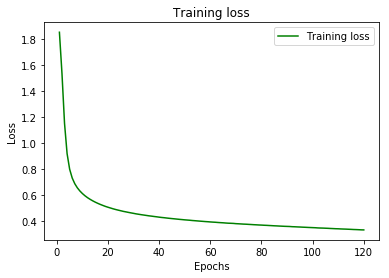

In [12]:
history_dict = history.history
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

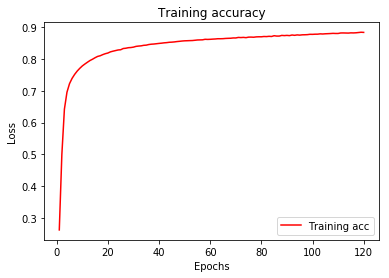

In [13]:
acc_values = history_dict['acc'] 

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make predictions

In [14]:
y_hat_test = model.predict(test) #Output (probability) predictions for the test set.

## Evaluate Performance

In [15]:
results_train = model.evaluate(train, label_train)
results_train

58500/58500 [==============================] - 1s 22us/step


[0.324629505378823, 0.8855042735042735]

In [16]:
results_test = model.evaluate(test, label_test)
results_test

1500/1500 [==============================] - 0s 28us/step


[0.27032812587420146, 0.9220000004768372]

## Results

The model provided was able to predict the test set with ~92% accuracy. 